In [14]:
from models import BurgersPinn
from plots import plot_burgers_model, plot_training_loss
from data import simulate_burgers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import MeanSquaredError, MeanRelativeError

In [2]:
network = BurgersPinn.build_network([32, 64])
pinn_model = BurgersPinn(network, nu=0.01)
pinn_model.compile()

2022-10-30 19:29:33.518343: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 19:29:33.629698: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 19:29:33.629979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-30 19:29:33.630712: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [3]:
(tx_samples, y_samples), (tx_init, y_init), (tx_boundary, y_boundary) = simulate_burgers(2000)
inputs = tf.stack([tx_samples, tx_init, tx_boundary], axis=0)
outputs = tf.stack([y_samples, y_init, y_boundary], axis=0)

In [4]:
history = pinn_model.fit(inputs, outputs, epochs=5000, optimizer=keras.optimizers.Adam(lr=0.001), progress_interval=200)

/home/nimahsn/anaconda3/envs/tf2/lib/python3.10/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch: 0 Loss: 0.4809 Total Elapsed Time: 3.05
Epoch: 200 Loss: 0.1942 Total Elapsed Time: 5.85
Epoch: 400 Loss: 0.1413 Total Elapsed Time: 8.78
Epoch: 600 Loss: 0.1269 Total Elapsed Time: 11.50
Epoch: 800 Loss: 0.1071 Total Elapsed Time: 14.02
Epoch: 1000 Loss: 0.1010 Total Elapsed Time: 16.53
Epoch: 1200 Loss: 0.0968 Total Elapsed Time: 19.06
Epoch: 1400 Loss: 0.0925 Total Elapsed Time: 21.59
Epoch: 1600 Loss: 0.0887 Total Elapsed Time: 24.10
Epoch: 1800 Loss: 0.0801 Total Elapsed Time: 26.84
Epoch: 2000 Loss: 0.0695 Total Elapsed Time: 29.62
Epoch: 2200 Loss: 0.0513 Total Elapsed Time: 32.34
Epoch: 2400 Loss: 0.0416 Total Elapsed Time: 35.16
Epoch: 2600 Loss: 0.0378 Total Elapsed Time: 37.86
Epoch: 2800 Loss: 0.0354 Total Elapsed Time: 40.49
Epoch: 3000 Loss: 0.0346 Total Elapsed Time: 43.00
Epoch: 3200 Loss: 0.0339 Total Elapsed Time: 45.59
Epoch: 3400 Loss: 0.0333 Total Elapsed Time: 48.19
Epoch: 3600 Loss: 0.0327 Total Elapsed Time: 50.77
Epoch: 3800 Loss: 0.0355 Total Elapsed Ti

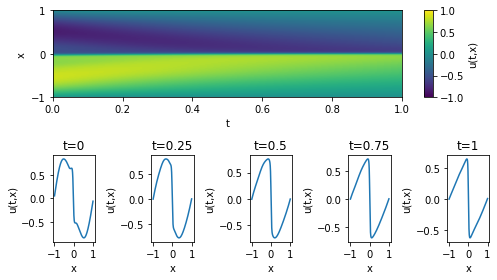

In [5]:
plot_burgers_model(pinn_model.network)

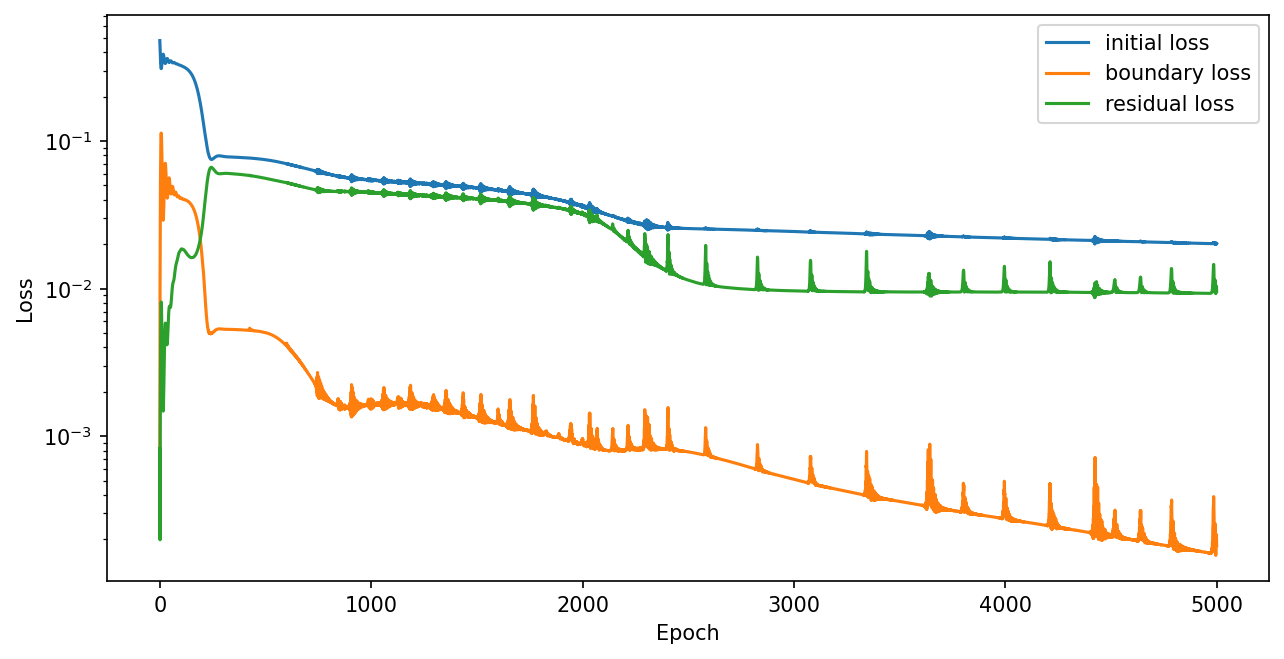

In [12]:
plot_training_loss(history, y_scale="log")